<a href="https://colab.research.google.com/github/remesis/BeatsAI/blob/main/CNN_7738_BeatsAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pandas as pd
import json
import os
import math
import librosa


dataDir = "/content/drive/MyDrive/Data/genres_original"
jsonPath = "/content/data.json"
csvPath = "/content/drive/MyDrive/Data/features_30_sec.csv"


df = pd.read_csv(csvPath)


df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


In [ ]:
df['filename']


0      blues.00000.wav
1      blues.00001.wav
2      blues.00002.wav
3      blues.00003.wav
4      blues.00004.wav
            ...       
995     rock.00095.wav
996     rock.00096.wav
997     rock.00097.wav
998     rock.00098.wav
999     rock.00099.wav
Name: filename, Length: 1000, dtype: object

In [ ]:
DATASET_PATH = dataDir
JSON_PATH = jsonPath
SAMPLE_RATE = 22050
TRACK_DURATION = 30
SAMPLES_PER_TRACK = SAMPLE_RATE * TRACK_DURATION

In [ ]:
def save_mfcc(dataset_path, json_path, num_mfcc=13, n_fft=2048, hop_length=512, num_segments=5):
    data = {
        "mapping": [],
        "labels": [],
        "mfcc": []
    }
    samples_per_segment = int(SAMPLES_PER_TRACK / num_segments)
    num_mfcc_vectors_per_segment = math.ceil(samples_per_segment / hop_length)
    for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):
        try:
            if dirpath is not dataset_path:
                semantic_label = dirpath.split("/")[-1]
                data["mapping"].append(semantic_label)
                print("\nProcessing: {}".format(semantic_label))
                for f in filenames:
                    file_path = os.path.join(dirpath, f)
                    signal, sample_rate = librosa.load(file_path, sr=SAMPLE_RATE)
                    for d in range(num_segments):
                        start = samples_per_segment * d
                        finish = start + samples_per_segment
                        mfcc = librosa.feature.mfcc(y=signal[start:finish], sr=sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
                        mfcc = mfcc.T
                        if len(mfcc) == num_mfcc_vectors_per_segment:
                            data["mfcc"].append(mfcc.tolist())
                            data["labels"].append(i-1)
                            print("{}, segment:{}".format(file_path, d+1))
        except Exception as e:
            print(f"Error {e}")
            continue
    with open(json_path, "w") as fp:
        json.dump(data, fp, indent=4)

In [ ]:
#save_mfcc(DATASET_PATH, JSON_PATH, num_segments=10)



Processing: hiphop
/content/drive/MyDrive/Data/genres_original/hiphop/hiphop.00005.wav, segment:1
/content/drive/MyDrive/Data/genres_original/hiphop/hiphop.00005.wav, segment:2
/content/drive/MyDrive/Data/genres_original/hiphop/hiphop.00005.wav, segment:3
/content/drive/MyDrive/Data/genres_original/hiphop/hiphop.00005.wav, segment:4
/content/drive/MyDrive/Data/genres_original/hiphop/hiphop.00005.wav, segment:5
/content/drive/MyDrive/Data/genres_original/hiphop/hiphop.00005.wav, segment:6
/content/drive/MyDrive/Data/genres_original/hiphop/hiphop.00005.wav, segment:7
/content/drive/MyDrive/Data/genres_original/hiphop/hiphop.00005.wav, segment:8
/content/drive/MyDrive/Data/genres_original/hiphop/hiphop.00005.wav, segment:9
/content/drive/MyDrive/Data/genres_original/hiphop/hiphop.00005.wav, segment:10
/content/drive/MyDrive/Data/genres_original/hiphop/hiphop.00011.wav, segment:1
/content/drive/MyDrive/Data/genres_original/hiphop/hiphop.00011.wav, segment:2
/content/drive/MyDrive/Data/gen

<ipython-input-4-6ccada1ba152>:17: UserWarning: PySoundFile failed. Trying audioread instead.
  signal, sample_rate = librosa.load(file_path, sr=SAMPLE_RATE)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Streaming output truncated to the last 5000 lines.
/content/drive/MyDrive/Data/genres_original/reggae/reggae.00002.wav, segment:7
/content/drive/MyDrive/Data/genres_original/reggae/reggae.00002.wav, segment:8
/content/drive/MyDrive/Data/genres_original/reggae/reggae.00002.wav, segment:9
/content/drive/MyDrive/Data/genres_original/reggae/reggae.00002.wav, segment:10
/content/drive/MyDrive/Data/genres_original/reggae/reggae.00003.wav, segment:1
/content/drive/MyDrive/Data/genres_original/reggae/reggae.00003.wav, segment:2
/content/drive/MyDrive/Data/genres_original/reggae/reggae.00003.wav, segment:3
/content/drive/MyDrive/Data/genres_original/reggae/reggae.00003.wav, segment:4
/content/drive/MyDrive/Data/genres_original/reggae/reggae.00003.wav, segment:5
/content/drive/MyDrive/Data/genres_original/reggae/reggae.00003.wav, segment:6
/content/drive/MyDrive/Data/genres_original/reggae/reggae.00003.wav, segment:7
/content/drive/MyDrive/Data/genres_original/reggae/reggae.00003.wav, segment:8


In [ ]:

import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras


In [ ]:
with open(jsonPath, "r") as fp:
  data = json.load(fp)

X = np.array(data["mfcc"])
y = np.array(data["labels"])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
model = keras.Sequential()

model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(X_train.shape[1], X_train.shape[2], 1)))
model.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Conv2D(32, (2, 2), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.3))

model.add(keras.layers.Dense(10, activation='softmax'))

In [ ]:
optimizer = keras.optimizers.Adam(learning_rate=0.0001)


model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 128, 11, 32)       320       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 64, 6, 32)         0         
 g2D)                                                            
                                                                 
 batch_normalization (Batch  (None, 64, 6, 32)         128       
 Normalization)                                                  
                                                                 
 conv2d_5 (Conv2D)           (None, 62, 4, 32)         9248      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 31, 2, 32)         0         
 g2D)                                                            
                                                      

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=100)


Epoch 1/100
236/236 [==============================] - 19s 71ms/step - loss: 2.4653 - accuracy: 0.2483 - val_loss: 1.8868 - val_accuracy: 0.3586
Epoch 2/100
236/236 [==============================] - 16s 69ms/step - loss: 1.8584 - accuracy: 0.3756 - val_loss: 1.5176 - val_accuracy: 0.4635
Epoch 3/100
236/236 [==============================] - 17s 70ms/step - loss: 1.6305 - accuracy: 0.4275 - val_loss: 1.3813 - val_accuracy: 0.4873
Epoch 4/100
236/236 [==============================] - 17s 73ms/step - loss: 1.4778 - accuracy: 0.4762 - val_loss: 1.2664 - val_accuracy: 0.5339
Epoch 5/100
236/236 [==============================] - 16s 66ms/step - loss: 1.3918 - accuracy: 0.5091 - val_loss: 1.2061 - val_accuracy: 0.5614
Epoch 6/100
236/236 [==============================] - 16s 68ms/step - loss: 1.3345 - accuracy: 0.5232 - val_loss: 1.1523 - val_accuracy: 0.5794
Epoch 7/100
236/236 [==============================] - 16s 66ms/step - loss: 1.2780 - accuracy: 0.5482 - val_loss: 1.0990 - val_ac

In [ ]:
model.evaluate(X_test,y_test,verbose=0)


[0.7443079948425293, 0.773834764957428]

In [21]:

model_save_name = 'cnn_7738_BeatsAI.keras'
path = F"/content/drive/MyDrive/SavedModels/{model_save_name}"
history.model.save(path)

In [18]:
import matplotlib.pyplot as plt


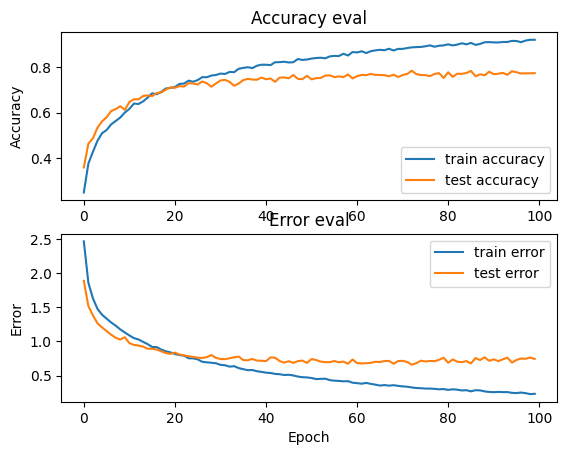

In [19]:

fig, axs = plt.subplots(2)
axs[0].plot(history.history["accuracy"], label="train accuracy")
axs[0].plot(history.history["val_accuracy"], label="test accuracy")
axs[0].set_ylabel("Accuracy")
axs[0].legend(loc="lower right")
axs[0].set_title("Accuracy eval")
#####ERROR#######################
axs[1].plot(history.history["loss"], label="train error")
axs[1].plot(history.history["val_loss"], label="test error")
axs[1].set_ylabel("Error")
axs[1].set_xlabel("Epoch")
axs[1].legend(loc="upper right")
axs[1].set_title("Error eval")

plt.show()

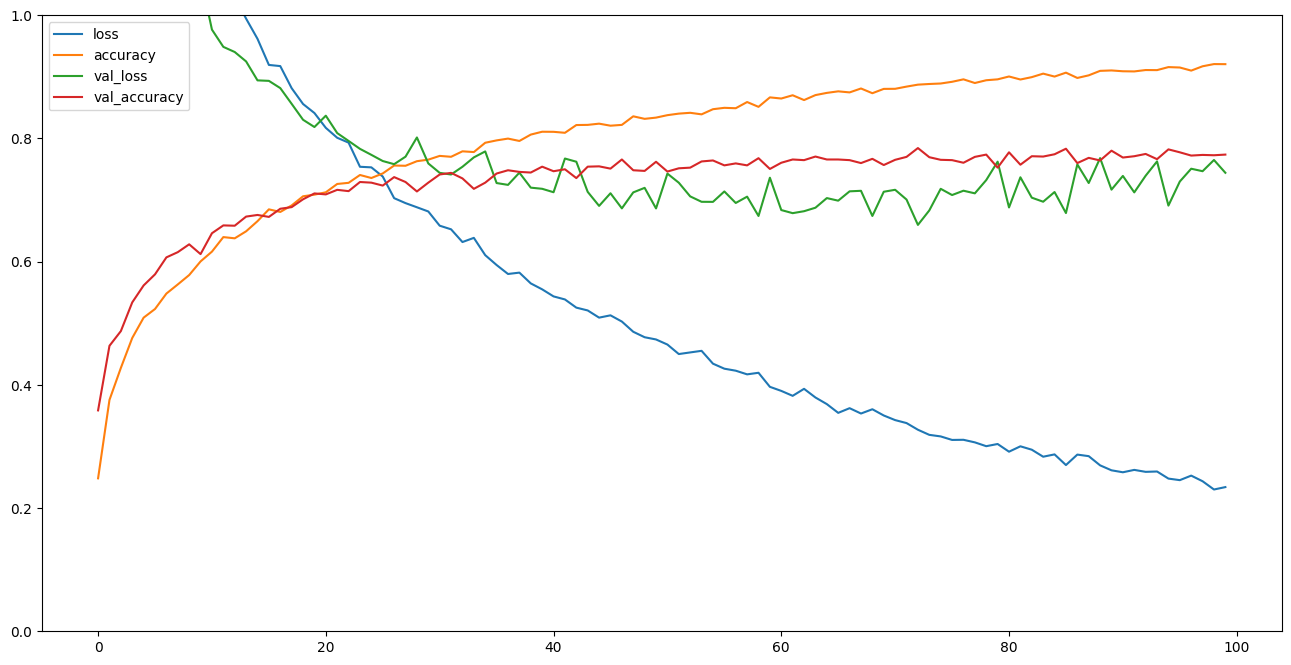

In [20]:
pd.DataFrame(history.history).plot(figsize=(16,8))
plt.ylim(0,1)
plt.show()